## **Práctica 12: Pronóstico (Árboles de decisión y Bosques Aleatorios)**

Nombre: 
* Diana Celeste Herrera Godina
* Alan Francisco Mora González 

No. Cuenta: 
* 316161927
* 113005901

Email: 
* dayanceles@gmail.com
* alanfmorag@gmail.com

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer un pronóstico del precio de las acciones a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [3]:
# Para Genomma Lab
data_genomma = yf.Ticker('LABB.MX')

In [4]:
genomma_hist = data_genomma.history(start = '2019-1-1', end = '2023-05-19', interval='1d')
genomma_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-06:00,10.257659,10.556512,10.143392,10.486194,1041057,0.0,0.0
2019-01-03 00:00:00-06:00,10.380716,11.426698,10.380716,11.163005,2443047,0.0,0.0
2019-01-04 00:00:00-06:00,11.163005,12.261726,10.978420,12.033192,1244149,0.0,0.0
2019-01-07 00:00:00-06:00,11.998033,12.402363,11.989244,12.314466,1338541,0.0,0.0
2019-01-08 00:00:00-06:00,12.446312,13.017648,12.006824,12.094722,2351253,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-12 00:00:00-06:00,14.810000,15.240000,14.720000,15.200000,2609774,0.0,0.0
2023-05-15 00:00:00-06:00,15.000000,15.490000,15.000000,15.480000,1839584,0.0,0.0
2023-05-16 00:00:00-06:00,15.440000,15.870000,15.210000,15.380000,3512555,0.0,0.0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

### **Descripción de la estructura de los datos**

Se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos. Se observa que los datos son numéricos (flotante y entero).

In [5]:
genomma_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1101 entries, 2019-01-02 00:00:00-06:00 to 2023-05-18 00:00:00-06:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1101 non-null   float64
 1   High          1101 non-null   float64
 2   Low           1101 non-null   float64
 3   Close         1101 non-null   float64
 4   Volume        1101 non-null   int64  
 5   Dividends     1101 non-null   float64
 6   Stock Splits  1101 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 68.8 KB


In [6]:
genomma_hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1101.000000,1101.000000,1101.000000,1101.000000,1.101000e+03,1101.000000,1101.0
mean,16.885118,17.188933,16.561170,16.870977,2.373991e+06,0.002080,0.0
std,2.311894,2.330376,2.271633,2.303294,2.222711e+06,0.032483,0.0
min,10.257659,10.556512,10.143392,10.486194,0.000000e+00,0.000000,0.0
25%,15.452413,15.821582,15.127191,15.469993,1.190373e+06,0.000000,0.0
50%,17.289475,17.530001,16.920304,17.245525,1.924456e+06,0.000000,0.0
75%,18.440934,18.792524,18.116391,18.431601,2.841654e+06,0.000000,0.0
max,21.464528,21.605250,21.005846,21.492611,3.679242e+07,0.763358,0.0


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los precios de las acciones**

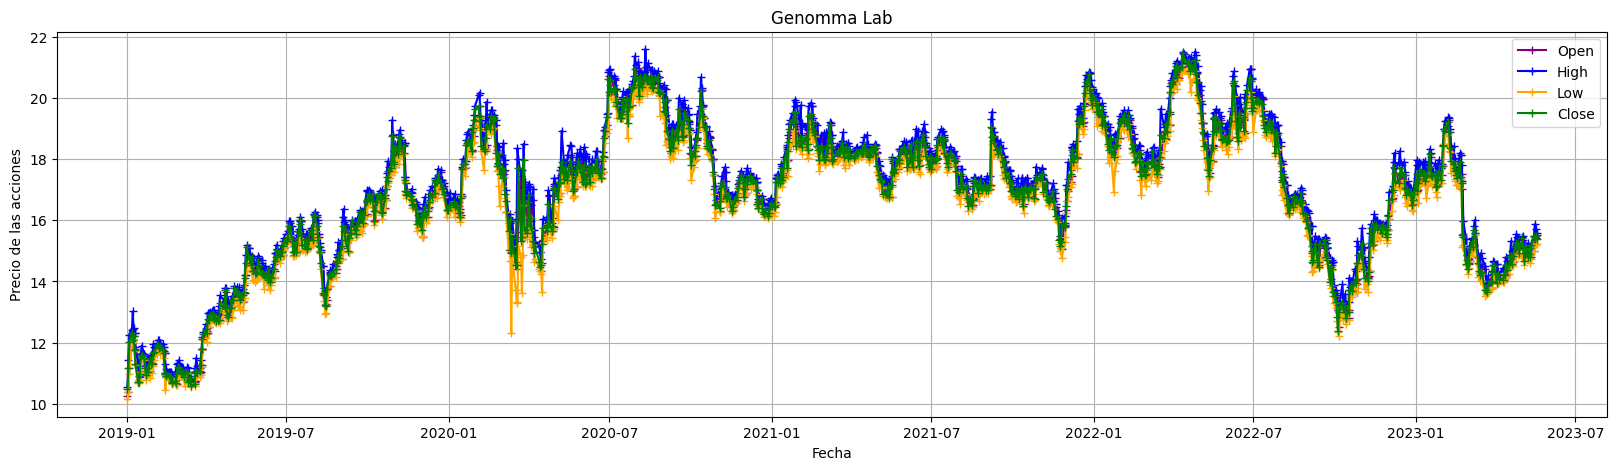

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(genomma_hist['Open'], color='purple', marker='+', label='Open')
plt.plot(genomma_hist['High'], color='blue', marker='+', label='High')
plt.plot(genomma_hist['Low'], color='orange', marker='+', label='Low')
plt.plot(genomma_hist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Genomma Lab')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
m_datos = genomma_hist.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
m_datos

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-06:00,10.257659,10.556512,10.143392,10.486194
2019-01-03 00:00:00-06:00,10.380716,11.426698,10.380716,11.163005
2019-01-04 00:00:00-06:00,11.163005,12.261726,10.978420,12.033192
2019-01-07 00:00:00-06:00,11.998033,12.402363,11.989244,12.314466
2019-01-08 00:00:00-06:00,12.446312,13.017648,12.006824,12.094722
...,...,...,...,...
2023-05-12 00:00:00-06:00,14.810000,15.240000,14.720000,15.200000
2023-05-15 00:00:00-06:00,15.000000,15.490000,15.000000,15.480000
2023-05-16 00:00:00-06:00,15.440000,15.870000,15.210000,15.380000


In [9]:
# En caso de tener valores nulos
m_datos = m_datos.dropna()
m_datos

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-06:00,10.257659,10.556512,10.143392,10.486194
2019-01-03 00:00:00-06:00,10.380716,11.426698,10.380716,11.163005
2019-01-04 00:00:00-06:00,11.163005,12.261726,10.978420,12.033192
2019-01-07 00:00:00-06:00,11.998033,12.402363,11.989244,12.314466
2019-01-08 00:00:00-06:00,12.446312,13.017648,12.006824,12.094722
...,...,...,...,...
2023-05-12 00:00:00-06:00,14.810000,15.240000,14.720000,15.200000
2023-05-15 00:00:00-06:00,15.000000,15.490000,15.000000,15.480000
2023-05-16 00:00:00-06:00,15.440000,15.870000,15.210000,15.380000


### **Aplicación del algoritmo de Arboles de decisión**

In [10]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [11]:
X = np.array(m_datos[['Open',
                     'High',
                     'Low']])
pd.DataFrame(X)

,0,1,2
0,10.257659,10.556512,10.143392
1,10.380716,11.426698,10.380716
2,11.163005,12.261726,10.978420
3,11.998033,12.402363,11.989244
4,12.446312,13.017648,12.006824
...,...,...,...
1096,14.810000,15.240000,14.720000
1097,15.000000,15.490000,15.000000
1098,15.440000,15.870000,15.210000
1099,15.430000,15.730000,15.240000


In [12]:
Y = np.array(m_datos[['Close']])
pd.DataFrame(Y)

,0
0,10.486194
1,11.163005
2,12.033192
3,12.314466
4,12.094722
...,...
1096,15.200000
1097,15.480000
1098,15.380000
1099,15.500000


Se hace la división de los datos

In [13]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [14]:
pd.DataFrame(x_test)

,0,1,2
0,18.194821,18.238769,18.019025
1,18.625519,18.713417,18.256348
2,17.254316,17.421322,17.157629
3,17.430111,17.702594,17.096101
4,15.098615,15.098615,14.563203
...,...,...,...
216,20.073078,20.968676,20.073078
217,17.992654,18.405775,17.931126
218,17.240000,17.920000,17.129999
219,19.283441,19.339606,18.843478


Se entrena el modelo

In [15]:
pronostico_ad = DecisionTreeRegressor(random_state=0)
pronostico_ad.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [16]:
#Se genera el pronóstico
y_pronostico = pronostico_ad.predict(x_test)
pd.DataFrame(y_pronostico)

,0
0,18.203609
1,18.282719
2,17.245525
3,17.421320
4,14.660000
...,...
216,20.569550
217,18.281826
218,17.324631
219,19.161747


In [17]:
valores = pd.DataFrame(y_test, y_pronostico)
valores

,0
18.203609,18.221189
18.282719,18.590359
17.245525,17.333424
17.421320,17.175209
14.660000,14.699490
...,...
20.569550,20.676632
18.281826,18.194820
17.324631,17.340000
19.161747,18.983892


In [18]:
r2_score(y_test, y_pronostico)

0.9867724692822233

In [19]:
print('Criterio: \n', pronostico_ad.criterion)
print('Importancia variables: \n', pronostico_ad.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(y_test, y_pronostico))
print("MSE: %.4f" % mean_squared_error(y_test, y_pronostico))
print("RMSE: %.4f" % mean_squared_error(y_test, y_pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(y_test, y_pronostico))

Criterio: 
 squared_error
Importancia variables: 
 [0.00191563 0.3135223  0.68456207]
MAE: 0.1881
MSE: 0.0724
RMSE: 0.2691
Score: 0.9868


#### **Conformación del modelo de pronóstico**

* Se tiene un Score de 0.9868, que indica que el pronóstico del precio de cierre de la acción se logrará con un 98.6% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 0.07 y 0.26 unidades del valor real, esto es, MSE y RMSE, respectivamente.

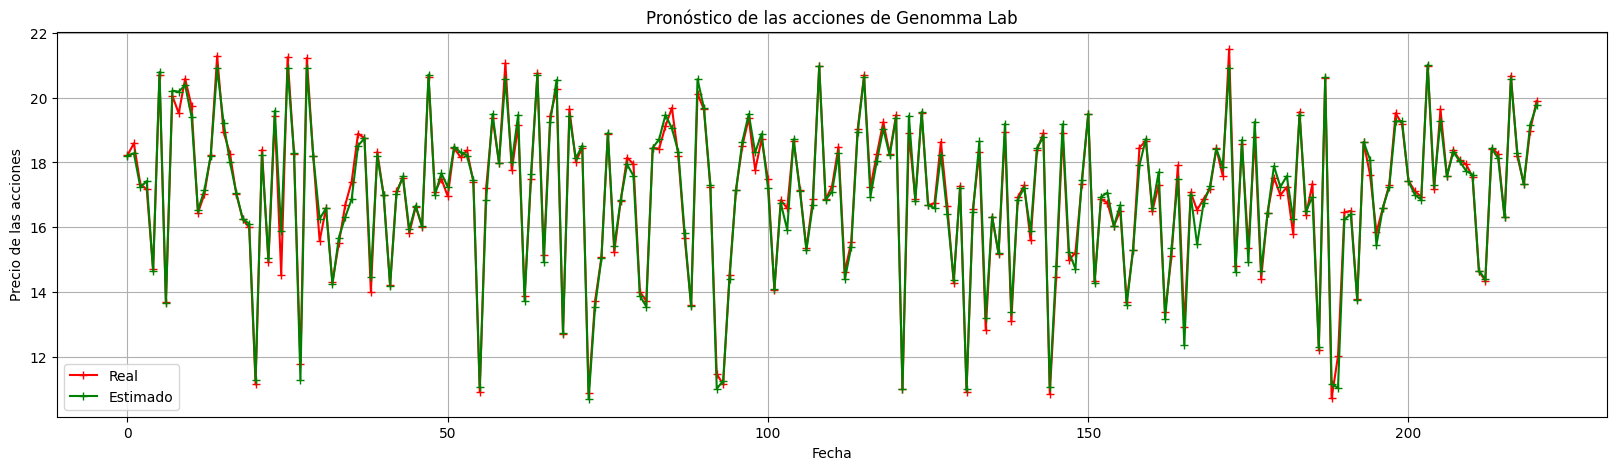

In [20]:
plt.figure(figsize=(20, 5))
plt.plot(y_test, color='red', marker='+', label='Real')
plt.plot(y_pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de Genomma Lab')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
importancia = pd.DataFrame({'Variable': list(m_datos[['Open', 'High', 'Low']]),
                            'Importancia': pronostico_ad.feature_importances_}).sort_values('Importancia', ascending=False)
importancia

,Variable,Importancia
2,Low,0.684562
1,High,0.313522
0,Open,0.001916


#### **Conformación del árbol**

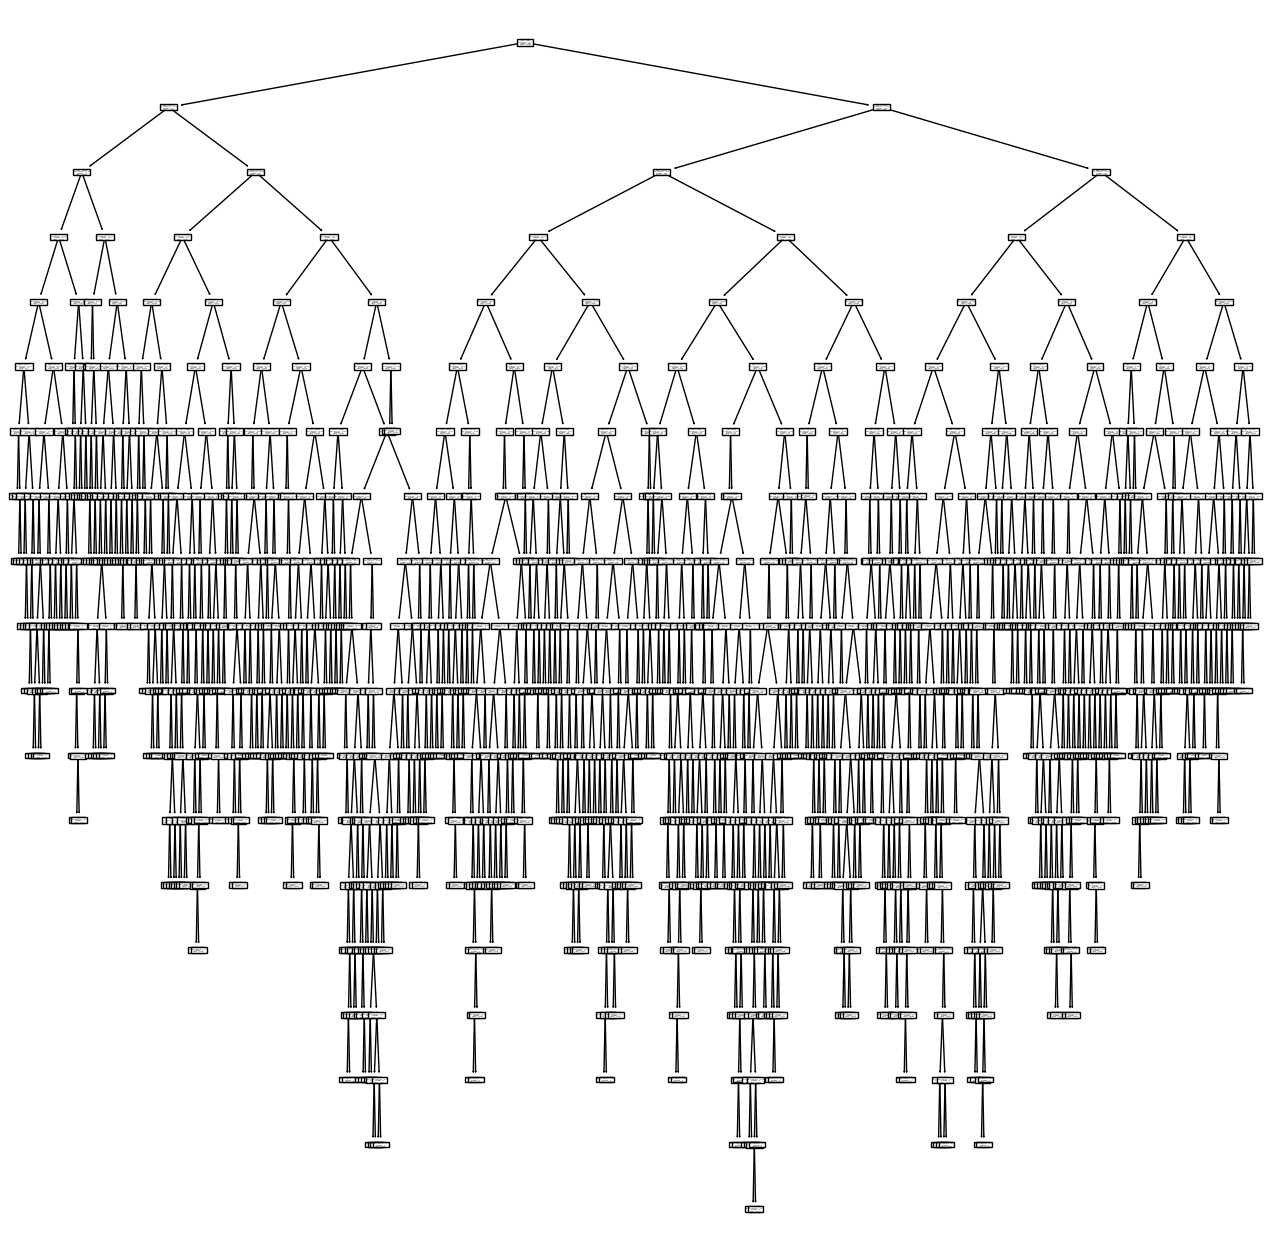

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(pronostico_ad, feature_names = ['Open', 'High', 'Low'])
plt.show()

In [23]:
from sklearn.tree import export_text
reporte = export_text(pronostico_ad, feature_names = ['Open', 'High', 'Low'])
print(reporte)

|--- Low <= 15.69
|   |--- High <= 13.59
|   |   |--- Low <= 11.75
|   |   |   |--- Low <= 11.02
|   |   |   |   |--- High <= 11.03
|   |   |   |   |   |--- High <= 10.85
|   |   |   |   |   |   |--- Open <= 10.50
|   |   |   |   |   |   |   |--- value: [10.49]
|   |   |   |   |   |   |--- Open >  10.50
|   |   |   |   |   |   |   |--- High <= 10.78
|   |   |   |   |   |   |   |   |--- value: [10.63]
|   |   |   |   |   |   |   |--- High >  10.78
|   |   |   |   |   |   |   |   |--- value: [10.59]
|   |   |   |   |   |--- High >  10.85
|   |   |   |   |   |   |--- Open <= 10.78
|   |   |   |   |   |   |   |--- Low <= 10.66
|   |   |   |   |   |   |   |   |--- value: [10.68]
|   |   |   |   |   |   |   |--- Low >  10.66
|   |   |   |   |   |   |   |   |--- Open <= 10.77
|   |   |   |   |   |   |   |   |   |--- value: [10.73]
|   |   |   |   |   |   |   |   |--- Open >  10.77
|   |   |   |   |   |   |   |   |   |--- value: [10.72]
|   |   |   |   |   |   |--- Open >  10.78
|   |   |   | 

#### **Nuevos pronósticos**

In [25]:
precio_accion = pd.DataFrame({'Open': [15.5],
                             'High': [16.2], 
                             'Low': [15.8]})
pronostico_ad.predict(precio_accion)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([16.12999916])

### **Aplicación del algoritmo de Bosques aleatorios**

In [26]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
x = np.array(m_datos[['Open',
                     'High',
                     'Low']])
pd.DataFrame(x)

,0,1,2
0,10.257659,10.556512,10.143392
1,10.380716,11.426698,10.380716
2,11.163005,12.261726,10.978420
3,11.998033,12.402363,11.989244
4,12.446312,13.017648,12.006824
...,...,...,...
1096,14.810000,15.240000,14.720000
1097,15.000000,15.490000,15.000000
1098,15.440000,15.870000,15.210000
1099,15.430000,15.730000,15.240000


In [28]:
y = np.array(m_datos[['Close']])
pd.DataFrame(y)

,0
0,10.486194
1,11.163005
2,12.033192
3,12.314466
4,12.094722
...,...
1096,15.200000
1097,15.480000
1098,15.380000
1099,15.500000


In [29]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [30]:
pd.DataFrame(x_test)

,0,1,2
0,18.194821,18.238769,18.019025
1,18.625519,18.713417,18.256348
2,17.254316,17.421322,17.157629
3,17.430111,17.702594,17.096101
4,15.098615,15.098615,14.563203
...,...,...,...
216,20.073078,20.968676,20.073078
217,17.992654,18.405775,17.931126
218,17.240000,17.920000,17.129999
219,19.283441,19.339606,18.843478


Se entrena el modelo

In [31]:
pronostico_ba = RandomForestRegressor(n_estimators=200, min_samples_split=8, min_samples_leaf=4, random_state=0)
pronostico_ba.fit(x_train, y_train)

<ipython-input-31-12bb4ef8dd21>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  pronostico_ba.fit(x_train, y_train)


RandomForestRegressor(min_samples_leaf=4, min_samples_split=8, n_estimators=200,
                      random_state=0)

In [32]:
#Se genera el pronóstico
y_pronostico = pronostico_ba.predict(x_test)
pd.DataFrame(y_pronostico)

,0
0,18.139104
1,18.455875
2,17.262346
3,17.405958
4,14.726473
...,...
216,20.597998
217,18.238920
218,17.504521
219,19.136569


In [33]:
valores = pd.DataFrame(y_test, y_pronostico)
valores

,0
18.139104,18.221189
18.455875,18.590359
17.262346,17.333424
17.405958,17.175209
14.726473,14.699490
...,...
20.597998,20.676632
18.238920,18.194820
17.504521,17.340000
19.136569,18.983892


In [34]:
r2_score(y_test, y_pronostico)

0.9929480150705539

In [35]:
print('Criterio: \n', pronostico_ba.criterion)
print('Importancia variables: \n', pronostico_ba.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(y_test, y_pronostico))
print("MSE: %.4f" % mean_squared_error(y_test, y_pronostico))
print("RMSE: %.4f" % mean_squared_error(y_test, y_pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(y_test, y_pronostico))

Criterio: 
 squared_error
Importancia variables: 
 [0.02274471 0.37949162 0.59776367]
MAE: 0.1434
MSE: 0.0386
RMSE: 0.1965
Score: 0.9929


#### **Conformación del modelo de pronóstico**

* Se tiene un Score de 0.9929, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.29% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 0.03 y 1.19 unidades del valor real, esto es, MSE y RMSE, respectivamente.

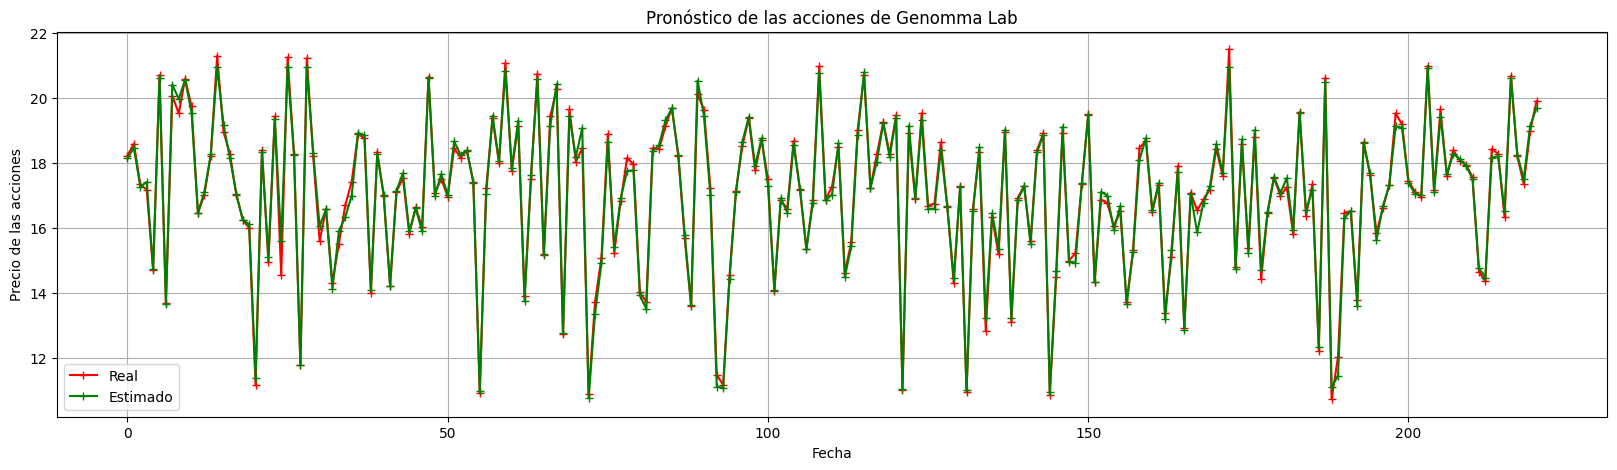

In [37]:
plt.figure(figsize=(20, 5))
plt.plot(y_test, color='red', marker='+', label='Real')
plt.plot(y_pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de Genomma Lab')
plt.grid(True)
plt.legend()
plt.show()

In [38]:
importancia = pd.DataFrame({'Variable': list(m_datos[['Open', 'High', 'Low']]),
                            'Importancia': pronostico_ba.feature_importances_}).sort_values('Importancia', ascending=False)
importancia

,Variable,Importancia
2,Low,0.597764
1,High,0.379492
0,Open,0.022745


#### **Conformación del árbol**

In [39]:
estimador = pronostico_ba.estimators_[50]
estimador

DecisionTreeRegressor(max_features=1.0, min_samples_leaf=4, min_samples_split=8,
                      random_state=600956192)

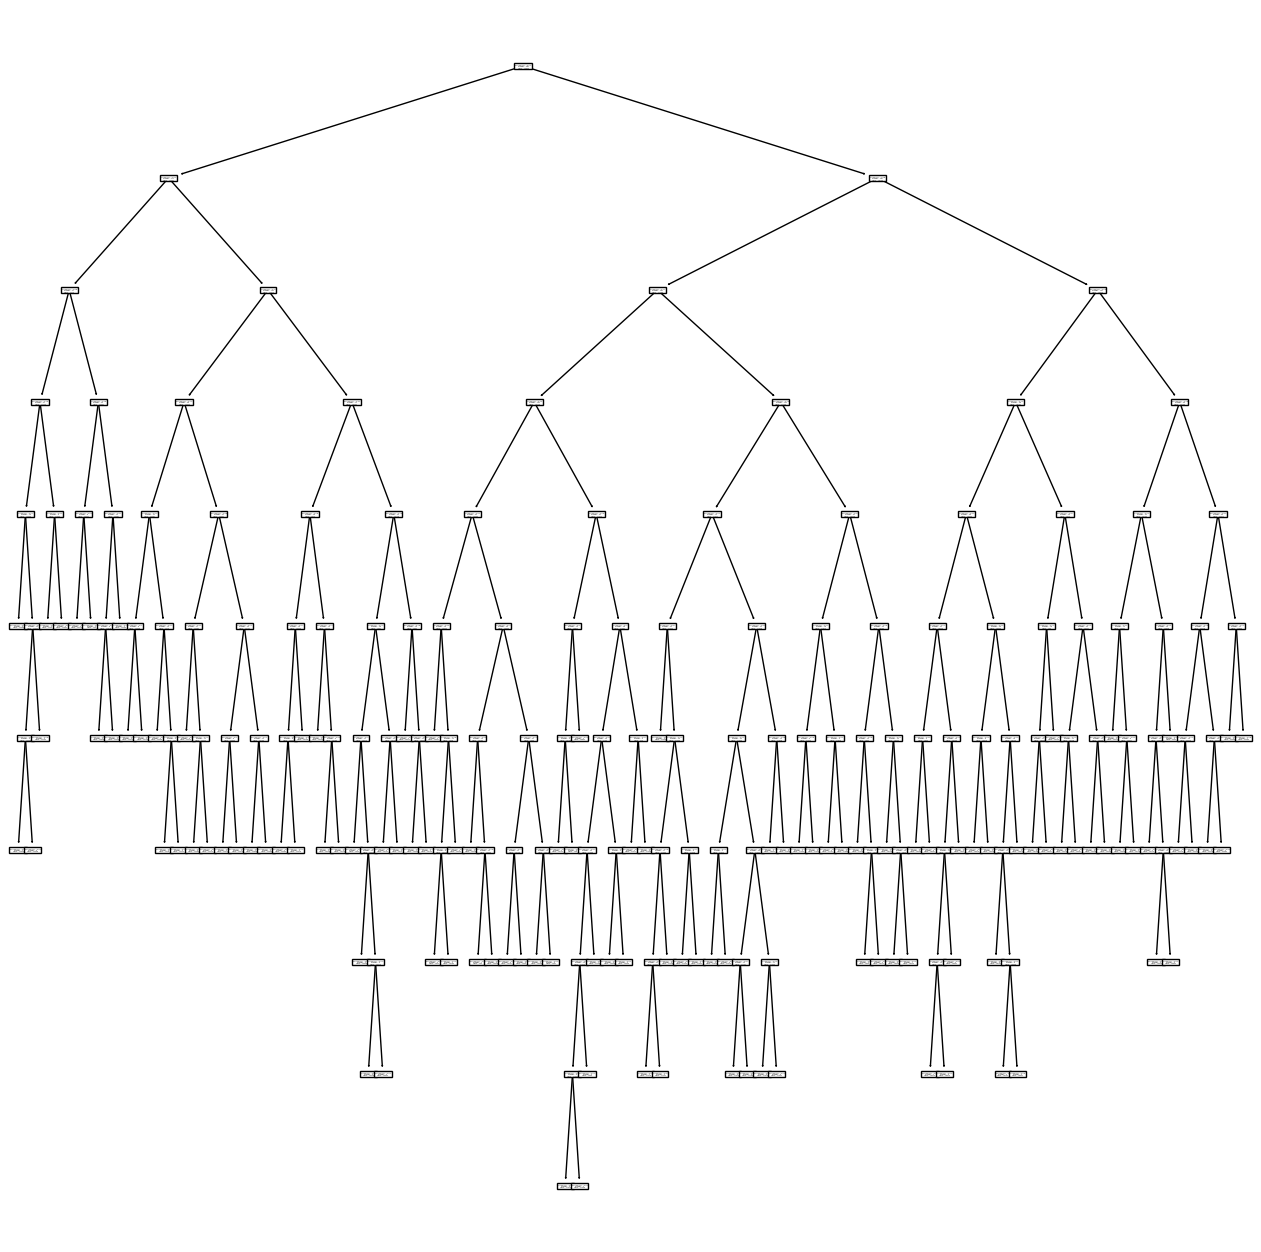

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(estimador, 
          feature_names = ['Open', 'High', 'Low'])
plt.show()

In [41]:
from sklearn.tree import export_text
reporte = export_text(estimador, 
                      feature_names = ['Open', 'High', 'Low'])
print(reporte)

|--- Low <= 15.69
|   |--- Low <= 13.18
|   |   |--- Low <= 11.75
|   |   |   |--- High <= 11.55
|   |   |   |   |--- High <= 11.00
|   |   |   |   |   |--- value: [10.68]
|   |   |   |   |--- High >  11.00
|   |   |   |   |   |--- Low <= 10.93
|   |   |   |   |   |   |--- High <= 11.16
|   |   |   |   |   |   |   |--- value: [10.89]
|   |   |   |   |   |   |--- High >  11.16
|   |   |   |   |   |   |   |--- value: [11.00]
|   |   |   |   |   |--- Low >  10.93
|   |   |   |   |   |   |--- value: [11.19]
|   |   |   |--- High >  11.55
|   |   |   |   |--- Low <= 11.34
|   |   |   |   |   |--- value: [11.59]
|   |   |   |   |--- Low >  11.34
|   |   |   |   |   |--- value: [11.69]
|   |   |--- Low >  11.75
|   |   |   |--- Low <= 12.49
|   |   |   |   |--- Low <= 12.09
|   |   |   |   |   |--- value: [12.17]
|   |   |   |   |--- Low >  12.09
|   |   |   |   |   |--- value: [12.50]
|   |   |   |--- Low >  12.49
|   |   |   |   |--- High <= 13.45
|   |   |   |   |   |--- Low <= 12.72
|   |

#### **Nuevos pronósticos**

In [42]:
precio_accion = pd.DataFrame({'Open': [15.5],
                             'High': [16.2], 
                             'Low': [15.8]})
pronostico_ba.predict(precio_accion)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([16.10368897])

#### **Comparativa de algoritmos**

In [45]:
precio_accion = pd.DataFrame({'Open': [15.5],
                             'High': [16.2], 
                             'Low': [15.8]})
print(pronostico_ad.predict(precio_accion))
print(pronostico_ba.predict(precio_accion))

[16.12999916]
[16.10368897]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
